### Maximal Information Coefficient (MIC)

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from minepy import MINE

In [33]:
def mic_mutual(x: np.ndarray, 
               features: np.array):
    
    matrix = []
    mine = MINE()

    for i in range(np.shape(x)[1]):
        matrix.append([])
        for j in range(np.shape(x)[1]):
            mine.compute_score(x[:, i], x[:, j])
            matrix[-1].append(mine.mic())

    matrix_df = pd.DataFrame(matrix, 
                            index=features, 
                            columns=features)
    
    mask = np.zeros_like(matrix_df)
    mask[np.triu_indices_from(mask)] = True

    cmap = sns.diverging_palette(h_neg=200, 
                                 h_pos=15, 
                                 s=75, 
                                 l=40, 
                                 n=9, 
                                 center="light", 
                                 as_cmap=True)
    plt.figure(figsize=(16, 12))
    plt.xticks(fontsize=(40/np.sqrt(len(matrix))))
    plt.yticks(fontsize=(40/np.sqrt(len(matrix))))
    sns.heatmap(matrix_df, 
                center=0, 
                annot=True, 
                fmt='.2f', 
                square=True, 
                cmap=cmap, 
                mask=mask)
    

def mic_target(x: np.ndarray, 
               y: np.ndarray, 
               features: np.array) -> pd.DataFrame:
    
    assert len(y.shape) == 2
    
    mic_list = np.array([])
    mine = MINE()

    for i in range(x.shape[1]):
        mic_tmp = 0
        for j in range(y.shape[1]):
            mine.compute_score(x[:, i], y[:, j])
            mic_tmp += mine.mic()
        mic_list = np.append(mic_list, mic_tmp/y.shape[1])
    
    mic_df = pd.DataFrame(mic_list, index=features, columns=['MIC'])
    sorted_mic_df = mic_df.sort_values(by='MIC', ascending=False)

    return sorted_mic_df

In [24]:
data = pd.read_excel('./example.xlsx')

features = data.columns[7:15] 
x = np.array(data[features])
y = np.array(data['y']).reshape(-1, 1)

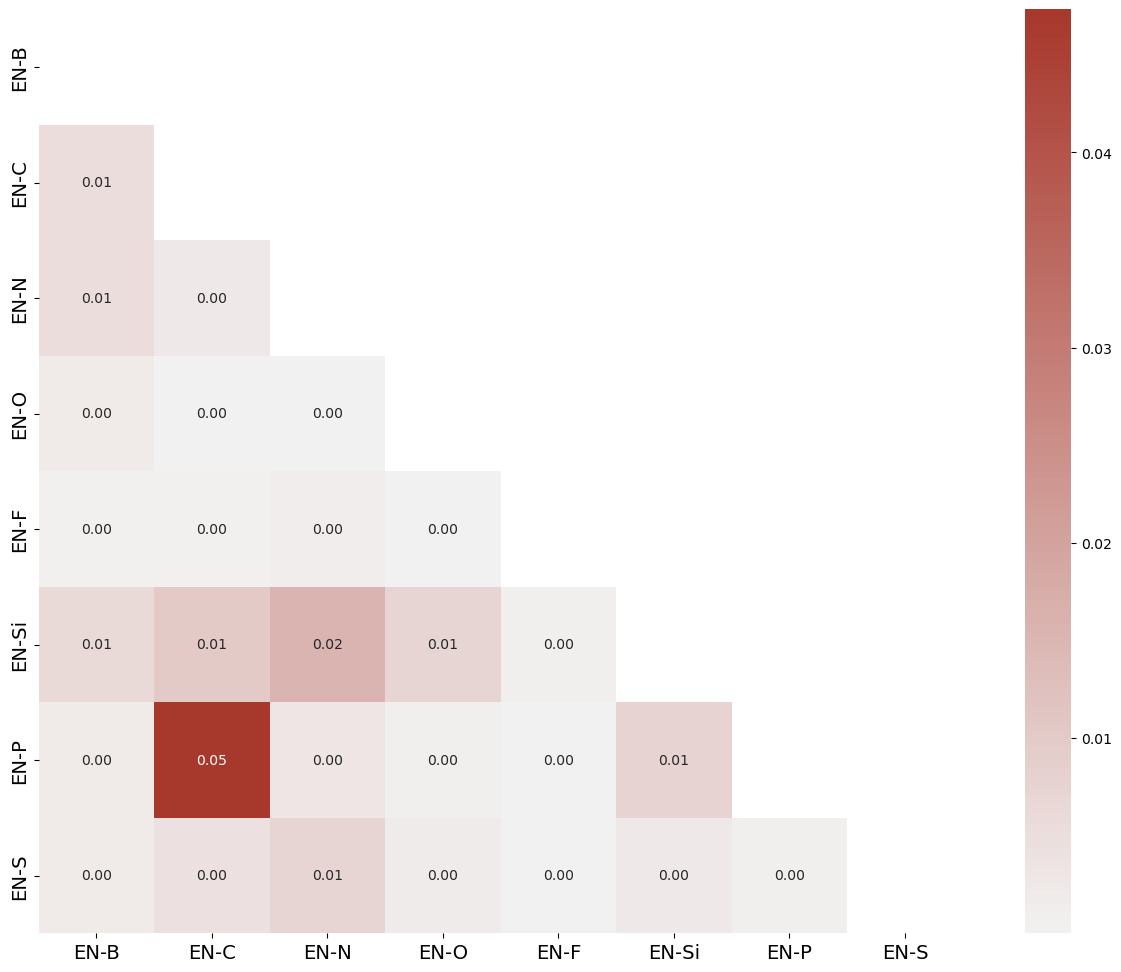

In [37]:
# calculate MIC correlation among each features
mic_mutual(x, features)

In [36]:
# calculate MIC correlation between each feature and the target
mic_target(x, y, features)

,MIC
EN-N,0.124007
EN-C,0.097449
EN-P,0.096214
EN-Si,0.086323
EN-O,0.085668
EN-S,0.079662
EN-B,0.076519
EN-F,0.041819
